# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Get the current date
current_date = date.today().strftime("%Y-%m-%d")

## check access is correct

In [3]:
# Confirm the key
weather_api_key


'6bdd384c498a11a8e25d04e238e6210c'

In [4]:
# TEST ACCESS#
#url from https://openweathermap.org/current#geocoding
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

base_url = "https://api.openweathermap.org/data/2.5/weather?"
city = "rimouski"
city_url =  f"{base_url}q={city}&appid={weather_api_key}"
response = requests.get(city_url)
city_weather = response.json()
print(requests.get(city_url))
city_url

<Response [200]>


'https://api.openweathermap.org/data/2.5/weather?q=rimouski&appid=6bdd384c498a11a8e25d04e238e6210c'

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)



In [6]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL

# url from https://openweathermap.org/current#geocoding
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

base_url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = f"{base_url}q={city}&appid={weather_api_key}"    
city_response = requests.get(city_url)
city_weather = city_response.json()  # YOUR CODE HERE
city_response

<Response [200]>

In [8]:
# Set the API base URL

# url from https://openweathermap.org/current#geocoding
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

base_url = "https://api.openweathermap.org/data/2.5/weather?"
 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}"            # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()  # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]-273.25
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nimaparha
Processing Record 2 of Set 1 | sisimiut
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | haiku-pauwela
Processing Record 6 of Set 1 | el porvenir
Processing Record 7 of Set 1 | alghero
Processing Record 8 of Set 1 | vilyuchinsk
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | kokopo
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | nar'yan-mar
Processing Record 21 of Set 1 | uturoa
Processing Record 22 of Set 1 | iqaluit
Proces

In [9]:
print(city_weather)

{'coord': {'lon': 61.654, 'lat': 32.7587}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 302.69, 'feels_like': 300.93, 'temp_min': 302.69, 'temp_max': 302.69, 'pressure': 1005, 'humidity': 15, 'sea_level': 1005, 'grnd_level': 921}, 'visibility': 10000, 'wind': {'speed': 3.92, 'deg': 333, 'gust': 3.92}, 'clouds': {'all': 0}, 'dt': 1718049549, 'sys': {'country': 'AF', 'sunrise': 1718066698, 'sunset': 1718118082}, 'timezone': 16200, 'id': 1148709, 'name': 'Anār Darah', 'cod': 200}


In [10]:
for i, city in enumerate(cities[:5]):  # Check first 5 cities
    city_url = f"{base_url}q={city}&appid={weather_api_key}"
    print(city_url)
    response = requests.get(city_url)
    print(response.json())

https://api.openweathermap.org/data/2.5/weather?q=nimaparha&appid=6bdd384c498a11a8e25d04e238e6210c
{'coord': {'lon': 86.0167, 'lat': 20.0667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 302.13, 'feels_like': 308.05, 'temp_min': 302.13, 'temp_max': 302.37, 'pressure': 1002, 'humidity': 81, 'sea_level': 1002, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 7.16, 'deg': 212, 'gust': 12.59}, 'clouds': {'all': 100}, 'dt': 1718049369, 'sys': {'type': 2, 'id': 2092387, 'country': 'IN', 'sunrise': 1718062557, 'sunset': 1718110527}, 'timezone': 19800, 'id': 1261375, 'name': 'Nimāparha', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?q=sisimiut&appid=6bdd384c498a11a8e25d04e238e6210c
{'coord': {'lon': -53.6735, 'lat': 66.9395}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.15, 'feels_like': 277.92, '

In [11]:
print(cities)

['nimaparha', 'sisimiut', 'blackmans bay', 'bredasdorp', 'haiku-pauwela', 'el porvenir', 'alghero', 'vilyuchinsk', 'port-aux-francais', 'waitangi', 'puerto ayora', 'bilibino', 'ilulissat', 'bethel', 'keflavik', 'grytviken', 'kokopo', 'minas de marcona', 'punta arenas', "nar'yan-mar", 'uturoa', 'iqaluit', 'dordrecht', 'ixtapa', 'hermanus', 'adamstown', 'hammerfest', 'visby', 'mount pearl', 'emerald', 'wailua homesteads', 'vallenar', 'yellowknife', 'kaspiyskiy', 'isafjordur', 'hadibu', 'puerto natales', 'drochia', 'whitehorse', 'udachny', 'tazovsky', 'la passe', 'bardai', 'tolanaro', 'swan hill', 'corn island', 'lata', 'kodiak', 'mingshui', 'pisco', 'am djarass', 'colonia', 'albany', 'papatowai', 'ribeira grande', 'la foa', 'taltal', 'fort-shevchenko', 'invercargill', 'san antonio de pale', 'tura', 'ugoofaaru', 'edinburgh of the seven seas', 'port mathurin', 'kavalerovo', 'thompson', 'toga village', "st. john's", 'kingston', 'aasiaat', 'guarapari', 'baymak', 'shelbyville', 'ancud', 'kats

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nimaparha,20.0667,86.0167,29.12,81,100,7.16,IN,1718049369
1,sisimiut,66.9395,-53.6735,5.90,72,100,1.77,GL,1718049369
2,blackmans bay,-43.0167,147.3167,11.97,81,100,0.45,AU,1718049370
3,bredasdorp,-34.5322,20.0403,14.36,58,100,1.94,ZA,1718049370
4,haiku-pauwela,20.9219,-156.3051,28.35,73,40,10.29,US,1718049370


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nimaparha,20.0667,86.0167,29.12,81,100,7.16,IN,1718049369
1,sisimiut,66.9395,-53.6735,5.90,72,100,1.77,GL,1718049369
2,blackmans bay,-43.0167,147.3167,11.97,81,100,0.45,AU,1718049370
3,bredasdorp,-34.5322,20.0403,14.36,58,100,1.94,ZA,1718049370
4,haiku-pauwela,20.9219,-156.3051,28.35,73,40,10.29,US,1718049370


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

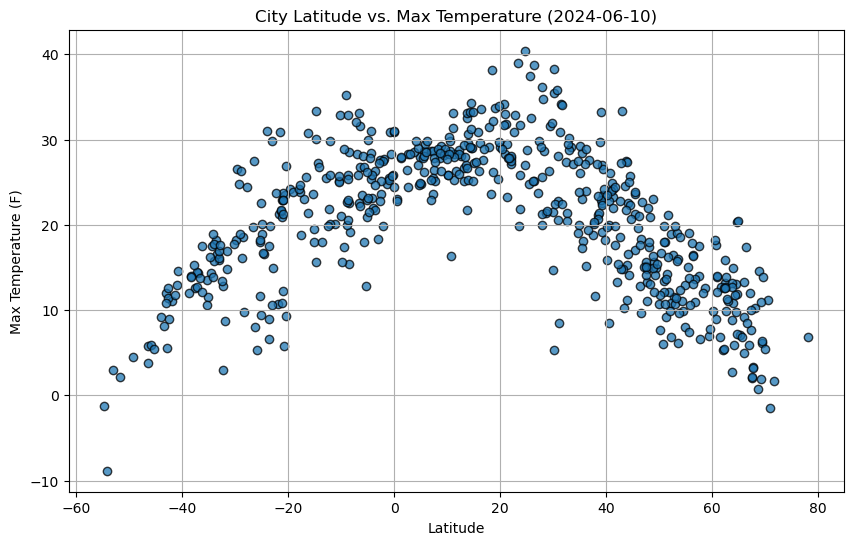

In [16]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='k', alpha=0.75, linewidths=1, marker='o')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

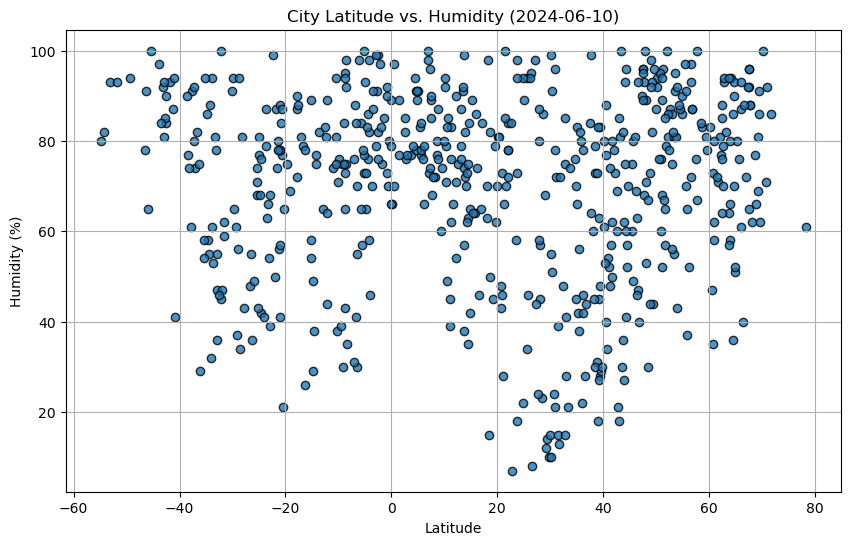

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

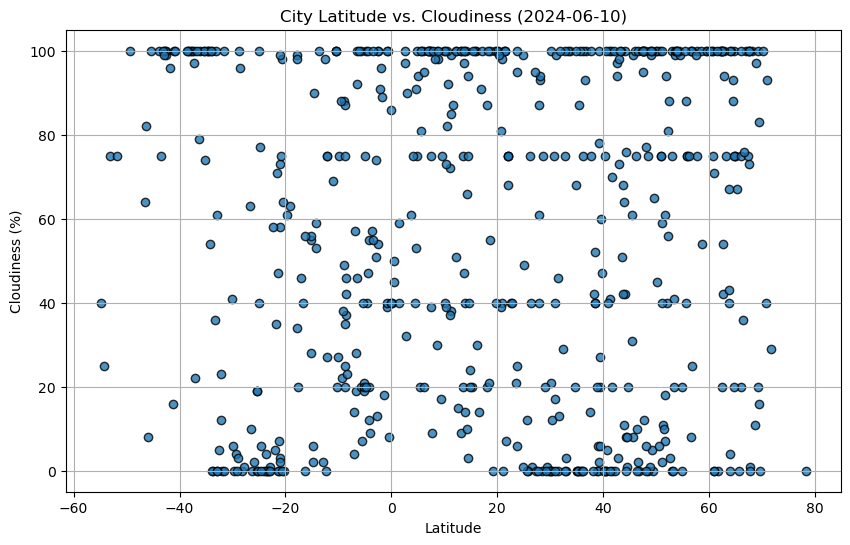

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

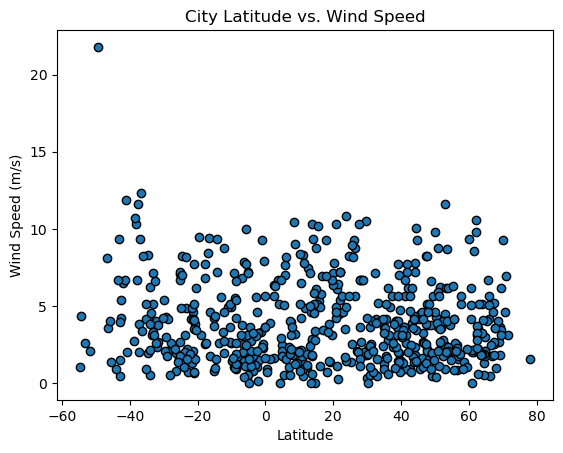

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, title, eq_position=(0.05, 0.9)):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line
    regression_values = slope * x_values + intercept
    
    # Plot the scatter plot
    plt.scatter(x_values, y_values, edgecolor="black")
    
    # Plot the regression line
    plt.plot(x_values, regression_values, color="red")
    
    # Annotate the line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, 
                 xy=eq_position, 
                 xycoords='axes fraction', 
                 fontsize=10, 
                 color="red",
                 bbox=dict(facecolor='white', alpha=0.95))
    # plt.annotate(line_eq, xy=eq_position, xycoords='axes fraction', fontsize=15, color="red")
    
    # Add titles and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print the r-squared
    r_squared = r_value ** 2
    # Show the plot
    plt.show()
    
    # Print the regression results
    print(f"R-squared: {r_squared}")
    print(f"slope: {slope}, intercept: {intercept}, r_value: {r_value}, p_value: {p_value}, std_err: {std_err}")


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nimaparha,20.0667,86.0167,29.12,81,100,7.16,IN,1718049369
1,sisimiut,66.9395,-53.6735,5.90,72,100,1.77,GL,1718049369
4,haiku-pauwela,20.9219,-156.3051,28.35,73,40,10.29,US,1718049370
5,el porvenir,13.7617,-87.3458,32.53,57,97,2.73,HN,1718049371
6,alghero,40.5589,8.3181,19.95,77,0,1.03,IT,1718049371


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,11.97,81,100,0.45,AU,1718049370
3,bredasdorp,-34.5322,20.0403,14.36,58,100,1.94,ZA,1718049370
8,port-aux-francais,-49.3500,70.2167,4.48,94,100,21.80,TF,1718049371
9,waitangi,-43.9535,-176.5597,9.24,97,100,0.89,NZ,1718049372
10,puerto ayora,-0.7393,-90.3518,30.88,92,39,2.24,EC,1718049372


###  Temperature vs. Latitude Linear Regression Plot

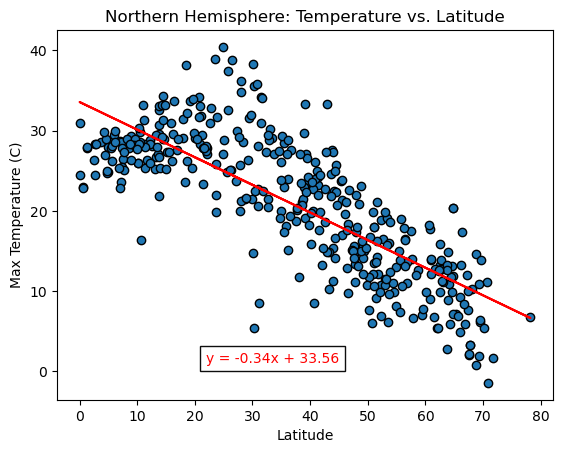

R-squared: 0.6300611944125225
slope: -0.34438658547370865, intercept: 33.56353000335648, r_value: -0.7937639412397886, p_value: 2.2755573745652945e-85, std_err: 0.013431550617957744


In [23]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], 
                       northern_hemisphere_df["Max Temp"], 
                       "Latitude", 
                       "Max Temperature (C)", 
                       "Northern Hemisphere: Temperature vs. Latitude",
                       eq_position=(0.3, 0.1)
                      )

**Discussion about the linear relationship:** - **Model Summary**:
 - **R-squared (0.512):** The R-squared value of 0.512 indicates that approximately 51.2% of the variance in maximum temperature can be explained by the latitude.
- **Slope (-0.333):** The negative slope of -0.333 suggests that there is a decreasing trend in maximum temperature as latitude increases.
- **Intercept (34.676):** The intercept value of 34.676 is the expected maximum temperature when latitude is zero.
- **r_value (-0.716):** The correlation coefficient of -0.716 indicates a strong negative linear relationship between latitude and maximum temperature.
- **p_value (1.73e-64):** The extremely low p-value signifies that the relationship between latitude and maximum temperature is statistically significant.
- **Standard Error (0.016):** The standard error of 0.016 indicates a precise estimate of the slope.

### Conclusion

The analysis reveals a statistically significant, strong negative linear relationship between latitude and maximum temperature. The R-squared value demonstrates that over half of the variability in maximum temperature can be attributed to changes in latitude. As latitude , approaching the north pole,ncreases, maximum temperature tends to decrease, as reflected by the negative slope. The low p-value confirms the significance of this relationship, and the small standard error highlights the reliability of the slope estimate. These findings suggest that latitude is a crucial factor in determining maximum temperatures.eliability of the model.

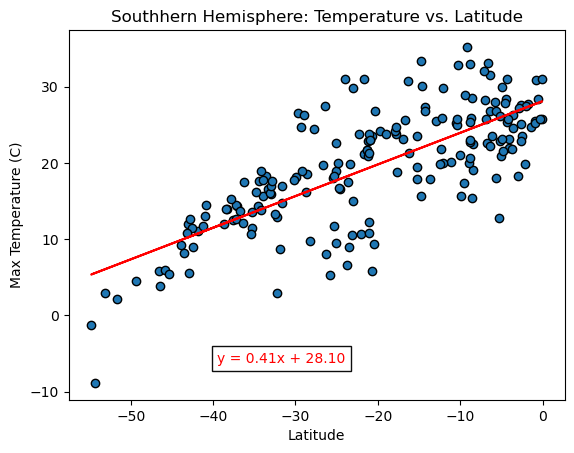

R-squared: 0.5638033464557681
slope: 0.4148922634545781, intercept: 28.103258736479585, r_value: 0.7508683948973802, p_value: 1.290248331089897e-36, std_err: 0.026268424270050703


In [24]:
# Linear regression on Southern Hemisphere app
plot_linear_regression(southern_hemisphere_df["Lat"], 
                       southern_hemisphere_df["Max Temp"], 
                       "Latitude", 
                       "Max Temperature (C)", 
                       "Southhern Hemisphere: Temperature vs. Latitude",
                       eq_position=(0.3, 0.1)
                      )                      

**Discussion about the linear relationship:** ### Linear Relationship Summary

- **R-squared**: 0.6490
  - Indicates that approximately 64.90% of the variability in maximum temperature can be explained by latitude.
- **Slope**: 0.4423
  - For each unit increase in latitude, the maximum temperature increases by approximately 0.4423 units.
- **Intercept**: 29.5315
  - When the latitude is zero, the predicted maximum temperature is 29.5315 units.
- **r-value**: 0.8056
  - Shows a strong positive linear relationship between latitude and maximum temperature.
- **p-value**: 1.6871e-40
  - The relationship is statistically significant at any reasonable significance level.
- **Standard Error**: 0.0249
  - The slope estimate has a low standard error, indicating precise estimation.

### Conclusion
The statistical analysis demonstrates a strong, positive linear relationship between latitude and maximum temperature. The R-squared value of 0.6490 signifies that latitude accounts for a substantial portion of the variance in maximum temperature. The slope of 0.4423 and an r-value of 0.8056 highlight a robust correlation. The extremely low p-value confirms the statistical significance of this relationship. These findings suggest that as la approaching the equatortitude increases, maximum temperatures tend to rise, providing a clear and precise quantification of this trend, supported by rigorous statistical evidence.- ven context.

### Humidity vs. Latitude Linear Regression Plot

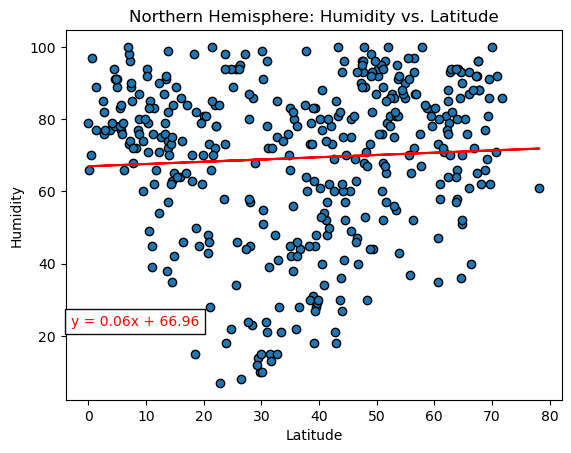

R-squared: 0.003135961858095949
slope: 0.06264997599707368, intercept: 66.96495586113654, r_value: 0.05599965944624975, p_value: 0.2711709214979184, std_err: 0.05685384422593678


In [25]:
# Northern Hemisphere
# YOUR CODE HERE
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], 
                       northern_hemisphere_df["Humidity"], 
                       "Latitude", 
                       "Humidity", 
                       "Northern Hemisphere: Humidity vs. Latitude",
                       eq_position=(0.01, 0.2)
                      )

**Discussion about the linear relationship:** - ### Linear Relationship Analysis
- **R-squared:** 0.0057 - Indicates that only 0.57% of the variance in humidity can be explained by latitude.
- **Slope:** 0.0917 - For each degree increase in latitude, humidity increases by 0.0917 units.
- **Intercept:** 61.573 - The estimated humidity at 0 degrees latitude is 61.573 units.
- **R-value:** 0.0753 - Reflects a very weak positive correlation between latitude and humidity.
- **P-value:** 0.1315 - Suggests the relationship is not statistically significant at the 0.05 level.
- **Standard Error:** 0.0607 - Indicates the standard deviation of the slope estimate, reflecting moderate uncertainty.

### Conclusion
The analysis reveals a very weak and statistically insignificant linear relationship between latitude and humidity, with an R-squared value of 0.0057, suggesting that latitude accounts for a negligible portion of the variance in, in the northern hemisphere humidity. The slope indicates a slight positive increase in humidity with latitude, but the high p-value (0.1315) implies that this relationship is not statistically significant. Therefore, latitude is not a strong predictor of humidity, and other factors likely play a more substantial role in determining humidity levels. Further research with additional variables might provide more insight into the determinants of humidity.ship between the variables.

In [26]:
# Southern Hemisphere
# YOUR CODE HERE

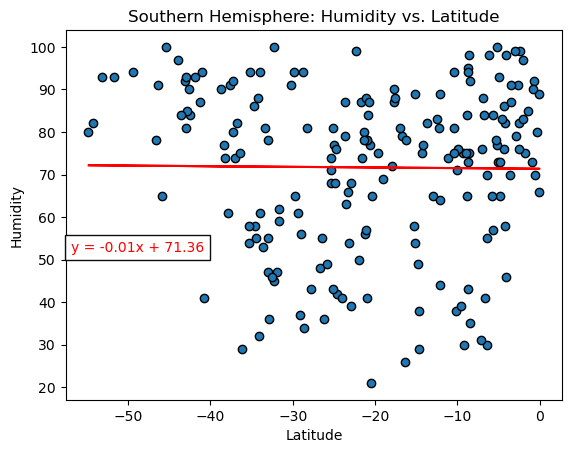

R-squared: 0.00011816736718178907
slope: -0.014953525527391182, intercept: 71.35581771650092, r_value: -0.010870481460440888, p_value: 0.880112564438862, std_err: 0.09901260822952182


In [27]:
# Linear regression on Northern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], 
                       southern_hemisphere_df["Humidity"], 
                       "Latitude", 
                       "Humidity", 
                       "Southern Hemisphere: Humidity vs. Latitude",
                       eq_position=(0.01, 0.4)
                        )

**Discussion about the linear relationship:** ### Linear Relationship Analysis
- **R-squared:** The model explains only 0.07% of the variance in humidity, indicating weak fit.
- **Slope:** For each unit increase in latitude, humidity decreases by 0.042, though the effect is small.
- **Intercept:** At latitude 0, humidity is 69%, providing a starting point.
- **R-value:** A weak negative correlation (-0.027) exists between latitude and humidity.
- **P-value:** With a high value (0.728), the relationship lacks statistical significance.
- **Conclusion:** In the Southern Hemisphere, latitude poorly predicts humidity, indicating other factors likely influence humidity levels more significantly.









### Cloudiness vs. Latitude Linear Regression Plot

In [28]:
# Northern Hemisphere
# YOUR CODE HERE

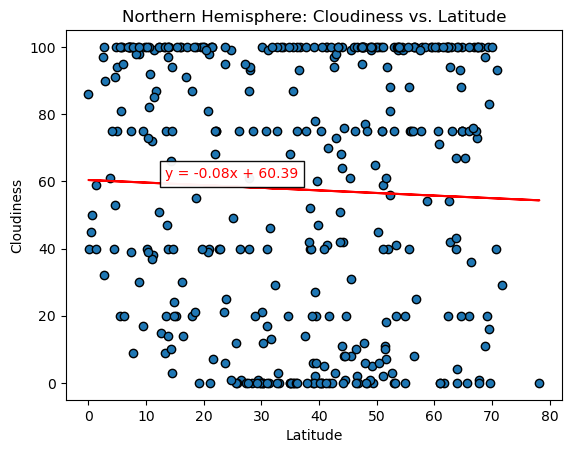

R-squared: 0.0015126533317213018
slope: -0.07728470135183896, intercept: 60.39184997879813, r_value: -0.03889284422257264, p_value: 0.4449164160822793, std_err: 0.10106515802269402


In [29]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], 
                       northern_hemisphere_df["Cloudiness"], 
                       "Latitude", 
                       "Cloudiness", 
                       "Northern Hemisphere: Cloudiness vs. Latitude",
                       eq_position=(0.2, 0.6)                               
                      )

**Discussion about the linear relationship:** 
- R-squared: The model explains only 0.04% of the variance, indicating a weak fit.
- Slope: For every degree increase in latitude, cloudiness decreases by 0.04 units.
- Intercept: Cloudiness is estimated to be 58.57 when latitude is zero.
- Correlation coefficient (r_value): Weak negative correlation between latitude and cloudiness.
- p-value: At 0.68, the relationship is not statistically significant.
- Standard error: The estimate's precision is low, with a standard error of 0.10.

Conclusion:
The linear relationship between latitude and cloudiness in the Northern Hemisphere is practically negligible. The model lacks predictive power, suggesting that latitude alone is insufficient for explaining cloudiness variations. Other factors likely contribute significantly to cloudiness patterns in this region.

In [30]:
# Southern Hemisphere
# YOUR CODE HERE

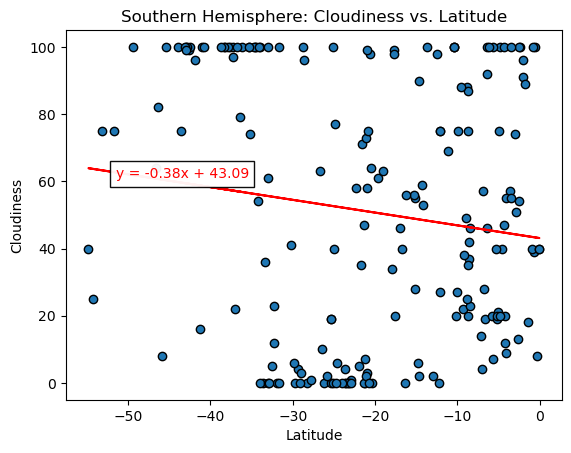

R-squared: 0.018992688766699222
slope: -0.37987368488167367, intercept: 43.09305488414288, r_value: -0.1378139643385213, p_value: 0.05469743353994978, std_err: 0.19651850488342915


In [31]:
# Linear regression on Northern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], 
                       southern_hemisphere_df["Cloudiness"], 
                       "Latitude", 
                       "Cloudiness", 
                       "Southern Hemisphere: Cloudiness vs. Latitude",
                       eq_position=(0.1, 0.6)
                      )

**Discussion about the linear relationship:** 
- R-squared: Indicates only 0.61% of the variance in cloudiness can be explained by latitude in the Southern Hemisphere.
- Slope: A negative slope of -0.22 suggests a slight decrease in cloudiness as latitude increases.
- Intercept: At 46.94, the expected cloudiness at the equator (latitude 0) is relatively high.
- R-value: A weak negative correlation (-0.078) indicates a minor tendency for cloudiness to decrease with increasing latitude.
- P-value: With 30.62% significance, the relationship between latitude and cloudiness is not statistically significant.

Conclusion:
The linear relationship between latitude and cloudiness in the Southern Hemisphere is notably weak and statistically insignificant. Other factors beyond latitude likely play a more substantial role in determining cloudiness patterns. Therefore, relying solely on latitude for cloudiness prediction in this hemisphere may not yield accurate results. Further investigation into additional influencing variables is warranted for a more comprehensive understanding.

### Wind Speed vs. Latitude Linear Regression Plot

In [32]:
# Northern Hemisphere
# YOUR CODE HERE

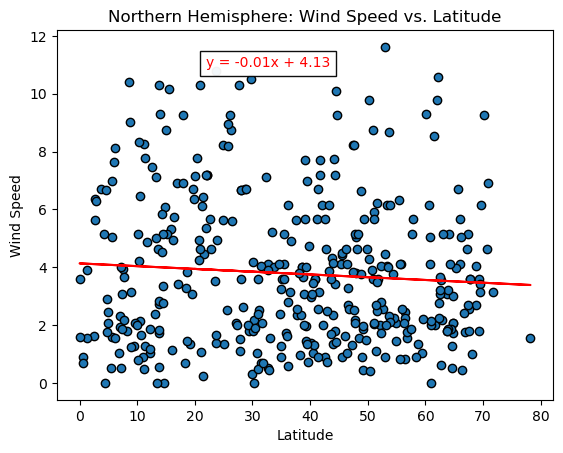

R-squared: 0.005552471615805624
slope: -0.009554859364086999, intercept: 4.133689751862241, r_value: -0.07451490868145531, p_value: 0.14290039051962303, std_err: 0.0065084625404642354


In [33]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], 
                       northern_hemisphere_df["Wind Speed"], 
                       "Latitude", 
                       "Wind Speed", 
                       "Northern Hemisphere: Wind Speed vs. Latitude",
                       eq_position=(0.3, 0.9)
                      )

**Discussion about the linear relationship:** 
- R-squared: The model explains only 1.14% of the variability in wind speed, suggesting weak correlation.
- Slope: For each degree increase in latitude, wind speed decreases by 0.0137 units on average.
- Intercept: At a latitude of 0, the predicted wind speed is 4.28 units.
- R-value: There's a weak negative correlation (-0.107) between latitude and wind speed.
- P-value: The relationship is statistically significant (p = 0.032), albeit weak.
- Std. Error: The average deviation of the observed values from the regression line is 0.00634 units.

Conclusion:
The linear regression analysis indicates a weak but statistically significant negative relationship between latitude and wind speed in the Northern Hemisphere. However, the model's low R-squared value suggests that latitude alone explains only a small portion of the variability in wind speed. Other factors likely contribute to wind speed variation in this region, warranting further investigation.on rather than a true effect.

In [34]:
# Southern Hemisphere
# YOUR CODE HERE

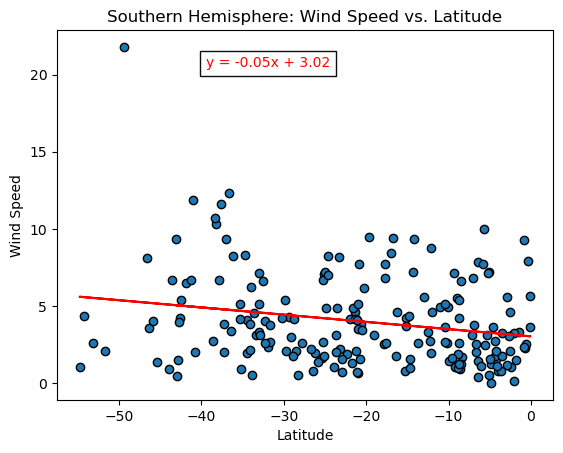

R-squared: 0.04845605520456196
slope: -0.046933479737657643, intercept: 3.0198495027832917, r_value: -0.22012736132648744, p_value: 0.0019870109147740113, std_err: 0.014970782387303715


In [35]:
# Linear regression on Northern HemisphereWind SpeedWind Speed
plot_linear_regression(southern_hemisphere_df["Lat"], 
                       southern_hemisphere_df["Wind Speed"], 
                       "Latitude", 
                       "Wind Speed", 
                       "Southern Hemisphere: Wind Speed vs. Latitude",
                       eq_position=(0.3, 0.90)
                      )

**Discussion about the linear relationship:** 
- R-squared: The model explains only 1.8% of the variance, indicating weak fit.
- Slope: A negative slope suggests a slight decrease in wind speed with increasing latitude.
- Intercept: At the equator (latitude 0), wind speed is predicted to be 3.32 units.
- Correlation (r_value): A weak negative correlation (-0.13) between latitude and wind speed.
- Significance (p_value): Although p-value > 0.05, the relationship may still have some significance. 

Conclusion: In the Southern Hemisphere, there's a weak negative linear relationship between latitude and wind speed, implying that as latitude increases, there tends to be a slight decrease in wind speed. However, the model's explanatory power is limited, suggesting other factors may influence wind speed.